In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 

In [17]:
dp = pd.read_csv("datasets/Mall_Customers.csv")
dp.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [21]:
x = dp[['Age','Annual Income (k$)','Spending Score (1-100)']].values
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [22]:
x = dp.iloc[:,3:5].values



In [23]:
a = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init = 'k-means++')
    kmeans.fit(x)
    a.append(kmeans.inertia_)

In [24]:
a

[269981.28,
 186362.95600651755,
 106348.37306211118,
 73880.64496247194,
 44454.47647967974,
 37271.8862365895,
 30552.71402546729,
 28730.514146221998,
 28631.9846666336,
 19770.069502743732]

Text(0, 0.5, 'Euclidean distance')

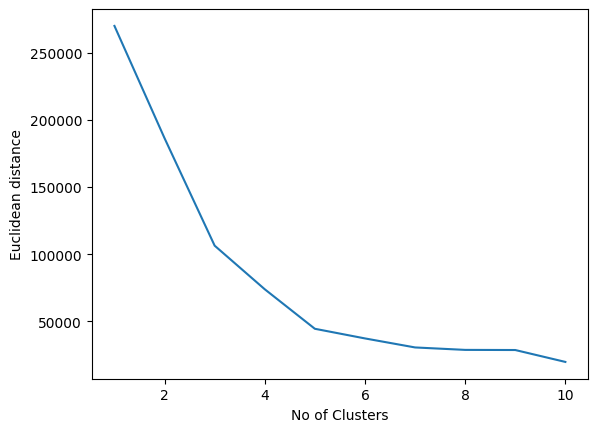

In [25]:
plt.plot(range(1,11),a)
plt.xlabel("No of Clusters")
plt.ylabel("Euclidean distance")


In [34]:
kmeans = KMeans(n_clusters=5, init='k-means++')
y_kmeans = kmeans.fit_predict(x)

In [31]:
y_kmeans

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [32]:
pd.concat([dp,pd.DataFrame(y_kmeans)],axis=1)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,1
197,198,Male,32,126,74,0
198,199,Male,32,137,18,1


Text(0.5, 0, 'Salary')

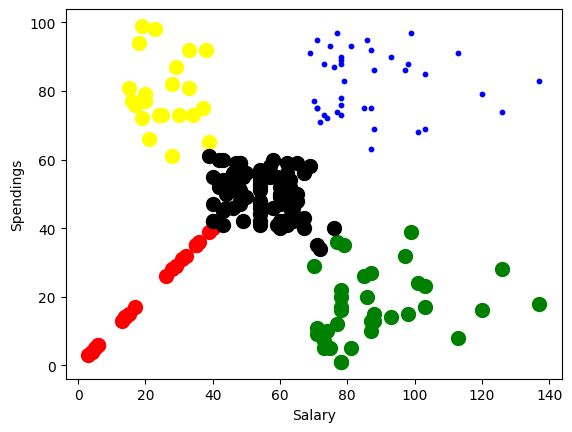

In [35]:
plt.scatter(x[y_kmeans==0,1],x[y_kmeans==0,1],s=100,c='red')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=10,c='blue')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='yellow')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='black')
plt.ylabel('Spendings')
plt.xlabel('Salary')